In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy import stats
from sklearn import preprocessing
from sklearn import feature_selection
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer 

In [2]:
train_df = pd.read_csv('./input/train.csv')
test_df = pd.read_csv('./input/test.csv')

In [3]:
df = pd.concat([train_df, test_df], axis=0, ignore_index=True)

## Pré Processamento

In [4]:
# Removing passenger id
df = df.drop('PassengerId', axis=1)

### Análise característica: Cabin

In [5]:
# Removing cabin
print(f'Quantidade de missing values na class Cabin {df['Cabin'].isna().sum()}')
print(f'Porcentagem de valores vazios na classe Cabin do total de passageiros: {(df['Cabin'].isna().sum()/len(df['Cabin'])) * 100:.2f}')

del(df['Cabin'])

Quantidade de missing values na class Cabin 1014
Porcentagem de valores vazios na classe Cabin do total de passageiros: 77.46


Por que remover a classe `Cabin`:
- Muitas instâncias com _missing values_
- Qualquer alternativa de **imputação de valores** iria enviesar muito os valores gerados
- O dado em sí não tem muito "valor"

### Análise de característica: Age

Quantidade de valores vazios na característica age: 263
Média de idade: 29.88


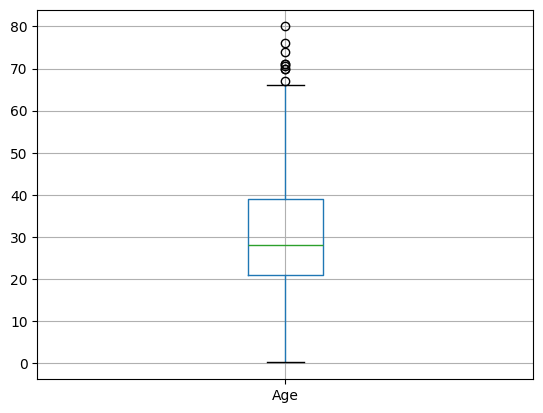

In [6]:
print(f'Quantidade de valores vazios na característica age: {df['Age'].isna().sum()}')
print(f'Média de idade: {df['Age'].mean():.2f}')
df.boxplot(['Age'])
plt.show()

TODO: why are using the mean to fill the missing values with the mean?

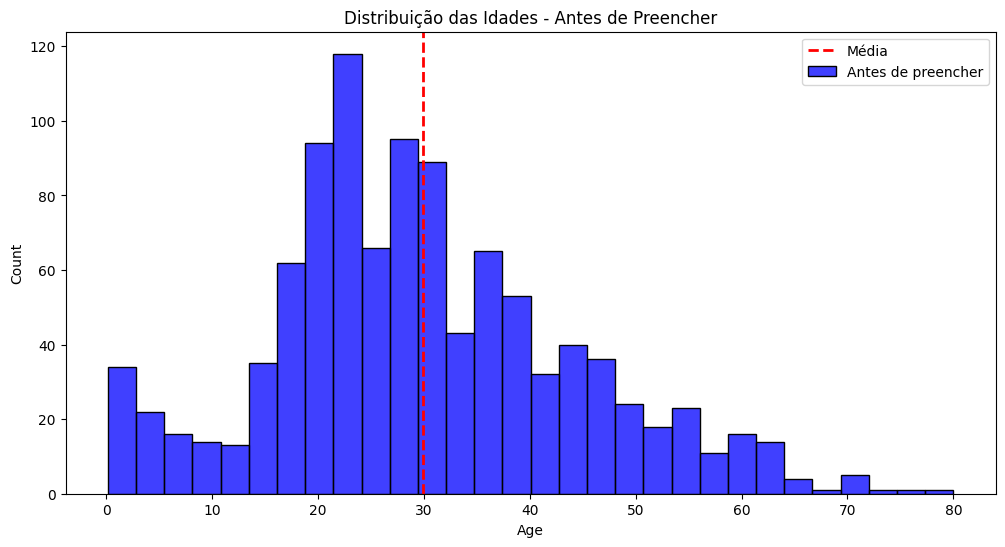

In [7]:
# Plotar histograma antes de preencher os valores nulos
plt.figure(figsize=(12, 6))
sns.histplot(df['Age'], bins=30, kde=False, color='blue', label='Antes de preencher')
plt.axvline(df['Age'].mean(), color='red', linestyle='dashed', linewidth=2, label='Média')
plt.title('Distribuição das Idades - Antes de Preencher')
plt.legend()
plt.show()

In [8]:
imputer = SimpleImputer(strategy='mean')
df['Age'] = imputer.fit_transform(df[['Age']])

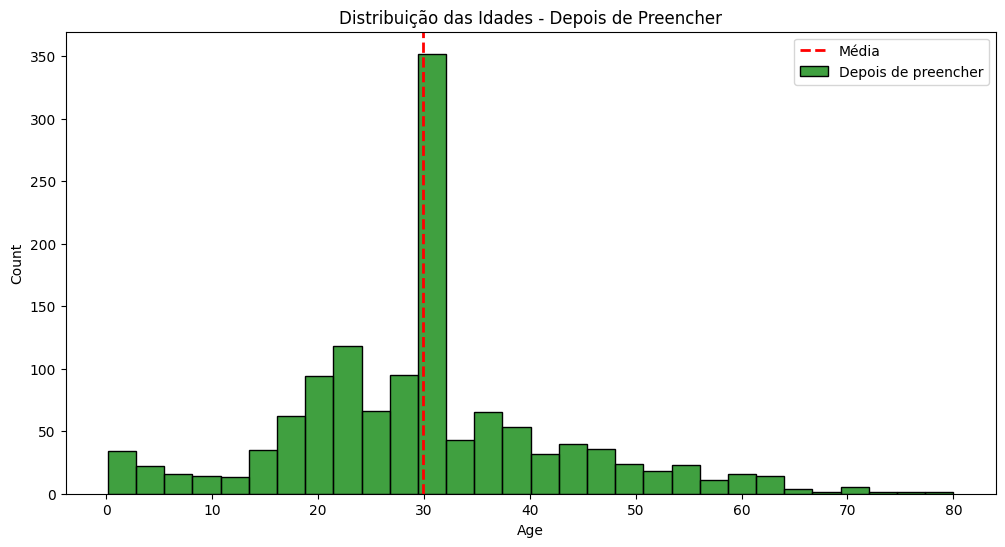

In [9]:
# Plotar histograma depois de preencher os valores nulos
plt.figure(figsize=(12, 6))
sns.histplot(df['Age'], bins=30, kde=False, color='green', label='Depois de preencher')
plt.axvline(df['Age'].mean(), color='red', linestyle='dashed', linewidth=2, label='Média')
plt.title('Distribuição das Idades - Depois de Preencher')
plt.legend()
plt.show()

In [10]:
# transforming to int
df['Survived'] = pd.to_numeric(df['Survived'], errors='coerce').astype('Int64')

In [11]:
# Removing duplicated values if any
df.drop_duplicates;

In [12]:
# one-hot encoding categorical classes
columns_to_encode = ['Sex', 'Embarked']
transformer = make_column_transformer(
    (preprocessing.OrdinalEncoder(), columns_to_encode),
)
df[columns_to_encode] = transformer.fit_transform(df[columns_to_encode])

### Análise de outliers utilizando **Box-Plot**

- TODO: Porque nao removemos os outliers do ticket
- TODO: Faz sentido criar "classes" de valores de ticket? 

In [13]:
q = df["Fare"].quantile(0.999)
df = df[df["Fare"] < q]

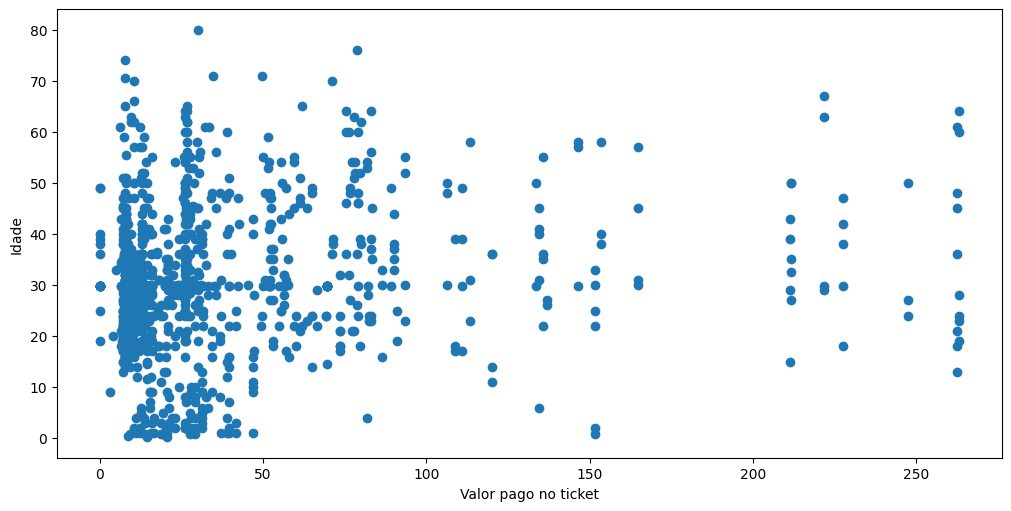

In [14]:
x = df['Fare']
y = df['Age']

# plot
fig, ax = plt.subplots(figsize=(10, 5), layout='constrained')

ax.scatter(x, y)
ax.set_xlabel('Valor pago no ticket')
ax.set_ylabel('Idade')

plt.show()

## Criando nova característica FamilySize

Característica criada a partir de “SibSp” e “Parch”

In [15]:
df['FamilySize'] = df['SibSp'] + df['Parch']
del df['SibSp']
del df['Parch']

In [16]:
family_survival_rate = df.groupby('FamilySize')['Survived'].mean().reset_index()

/var/folders/jg/7z54w3515q3fm34byqrlmcl00000gn/T/ipykernel_70178/2773205512.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='FamilySize', y='Survived', data=family_survival_rate, palette='viridis')


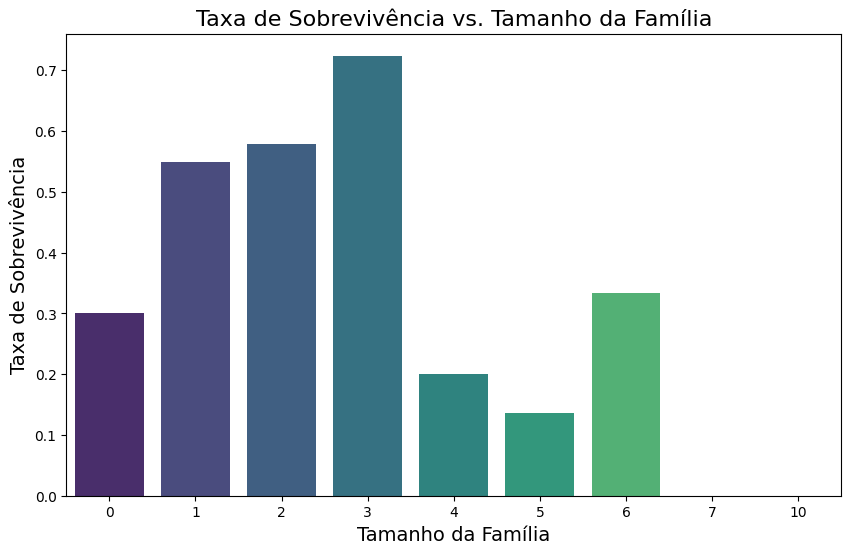

In [17]:
# Plotar o gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x='FamilySize', y='Survived', data=family_survival_rate, palette='viridis')

# Títulos e rótulos
plt.title('Taxa de Sobrevivência vs. Tamanho da Família', fontsize=16)
plt.xlabel('Tamanho da Família', fontsize=14)
plt.ylabel('Taxa de Sobrevivência', fontsize=14)
plt.show()

### TODO: Balanceamento de classes

In [18]:
print(f'Quantidade de valores nulos: {df['Sex'].isna().sum()}')
male_count, female_count = df['Sex'].value_counts().values
print(f'Quantidade de homens: {male_count}')
print(f'Quantidade de mulheres: {female_count}')

Quantidade de valores nulos: 0
Quantidade de homens: 840
Quantidade de mulheres: 464


## Correlações entre as caracteristicas

In [19]:
correlation_matrix = df[
    ['Survived', 'Pclass', 'Sex', 'Age', 'Fare']
].corr() # Pearson's coefficient

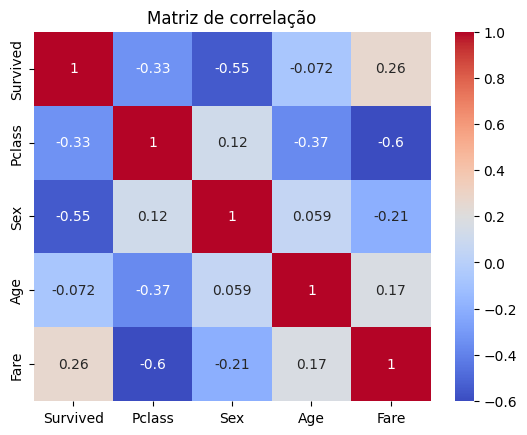

In [20]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlação')
plt.show()

## Redução de dimensionalidade

### Algoritmo **_Sequential Backward Selection_** para seleção de subconjunto

In [21]:
sbs = feature_selection.SequentialFeatureSelector(df)

In [22]:
sbs.fit_transform()

TypeError: TransformerMixin.fit_transform() missing 1 required positional argument: 'X'